In [1]:
from scipy.stats import norm
from nautilus import Prior

prior = Prior()
prior.add_parameter('a', dist=(-5, +5))
prior.add_parameter('b', dist=(-5, +5))
prior.add_parameter('c', dist=norm(loc=0, scale=2.0))

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

def likelihood(param_dict):
    x = np.array([param_dict['a'], param_dict['b'], param_dict['c']])
    return multivariate_normal.logpdf(
        x, mean=np.zeros(3), cov=[[1, 0, 0.90], [0, 1, 0], [0.90, 0, 1]])

In [15]:
from nautilus import Sampler

sampler = Sampler(prior, likelihood, n_live=1000)
results = sampler.run(verbose=True)

Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Finished  | 13     | 1        | 4        | 16700    | N/A    | 10053 | -6.33    


In [16]:
import corner
import matplotlib.pyplot as plt

points, log_w, log_l = results.posterior()
corner.corner(
    points, weights=np.exp(log_w), bins=20, labels=prior.keys, color='purple',
    plot_datapoints=False, range=np.repeat(0.999, len(prior.keys)))

AttributeError: 'numpy.bool_' object has no attribute 'posterior'

{'a': array([ 1.77683764, -1.92776941,  1.19265782, ..., -0.21339823,
       -0.01561258,  0.09094261]), 'b': array([-0.00600054, -0.31197886,  2.24690082, ..., -0.13719891,
       -0.26334804,  0.18906379]), 'c': array([-0.22352869, -0.57241219,  2.16300431, ..., -0.21187333,
       -0.02125456,  0.08321502])}


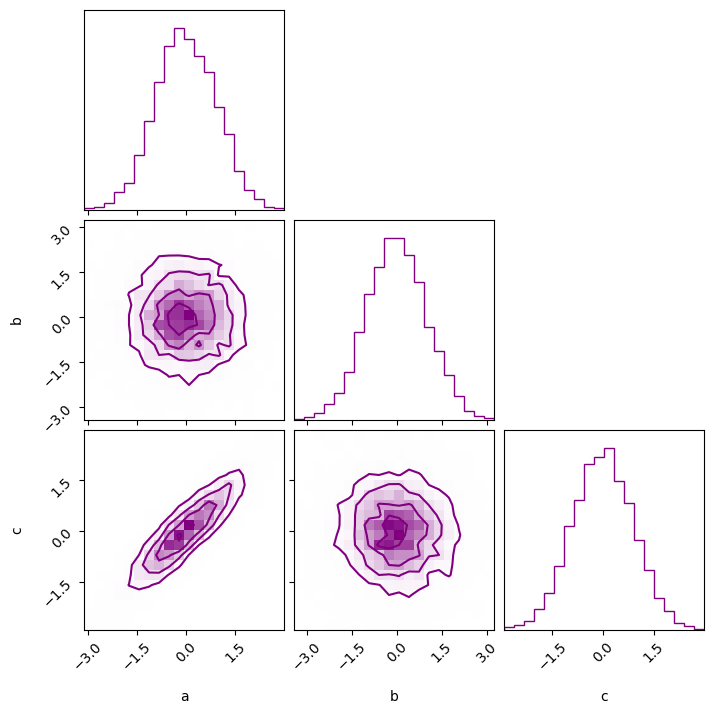

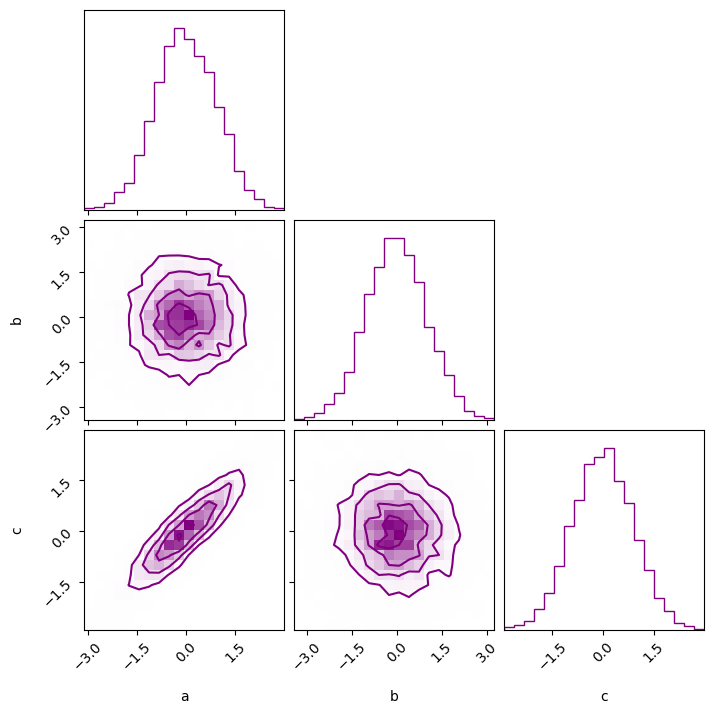

In [14]:
import corner
import matplotlib.pyplot as plt

points, log_w, log_l = sampler.posterior(return_as_dict=True, equal_weight=True, equal_weight_boost=2)
print(points)
corner.corner(
    points,  bins=20, labels=prior.keys, color='purple',
    plot_datapoints=False, range=np.repeat(0.999, len(prior.keys)))

In [5]:
print('log Z: {:.2f}'.format(sampler.log_z))


log Z: -6.34


In [8]:
np.exp(log_w)

array([1.06788540e-40, 8.94574515e-14, 3.26701491e-12, ...,
       9.71943285e-06, 9.59355015e-06, 9.79122765e-06])

In [ ]:
import numpy as np
from nautilus import Prior, Sampler
from scipy.stats import multivariate_normal

prior = Prior()
for key in 'abc':
    prior.add_parameter(key)

def likelihood(param_dict):
    x = [param_dict[key] for key in 'abc']
    return multivariate_normal.logpdf(x, mean=[0.4, 0.5, 0.6], cov=0.01)

sampler = Sampler(prior, likelihood, filepath='checkpoint.hdf5')
sampler.run(verbose=True)